Іморти і генерація даних навколо прямої

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

k = 13
b = 19

x = np.linspace(0, 10, 500)
y = k*x+b + np.random.normal(0, 15, 500)
data = pd.DataFrame({'X': x, 'Y': y})


Візуалізація

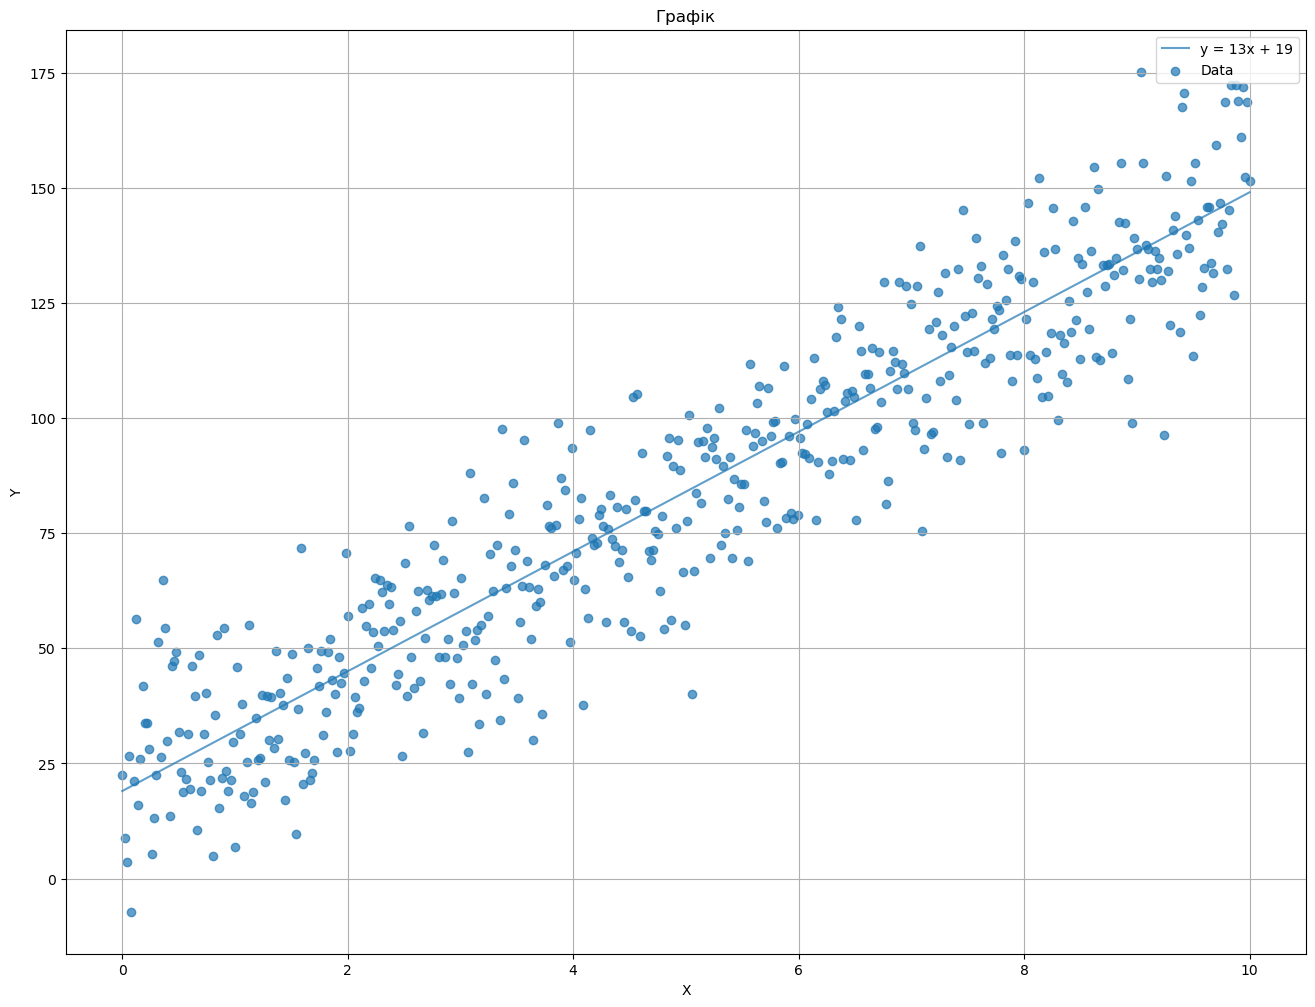

In [3]:
plt.figure(figsize=(16, 12))
plt.plot(x, k*x+b, alpha=0.7, label =f'y = {k}x + {b}')
plt.scatter(data.X, data.Y, alpha=0.7, label='Data')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Графік')
plt.grid(True)

plt.show()

Найменші квадрати

In [4]:
def squaremeth(x, y):
    x_m = sum(x) / len(x)
    y_m = sum(y) / len(y)

    s1 = sum((xi - x_m) * (yi -y_m) for xi, yi, in zip(x,y))
    s2 = sum((xi - x_m) ** 2 for xi in x)

    k = s1 / s2
    b = y_m - k * x_m

    return k, b

print(f"k: {k}")
print(f"b: {b} \n")

k_LSM, b_LSM = squaremeth(data.X, data.Y)

print(f"k(LSM): {k_LSM}")
print(f"b(LSM): {b_LSM} \n")

k_POLY, b_POLY = np.polyfit(data.X, data.Y, 1)
print(f"k(POLY): {k_POLY}")
print(f"b(POLY): {b_POLY} \n")


k: 13
b: 19 

k(LSM): 12.852696582217748
b(LSM): 19.02422858974552 

k(POLY): 12.852696582217744
b(POLY): 19.024228589745544 



Візуалізація нових ліній

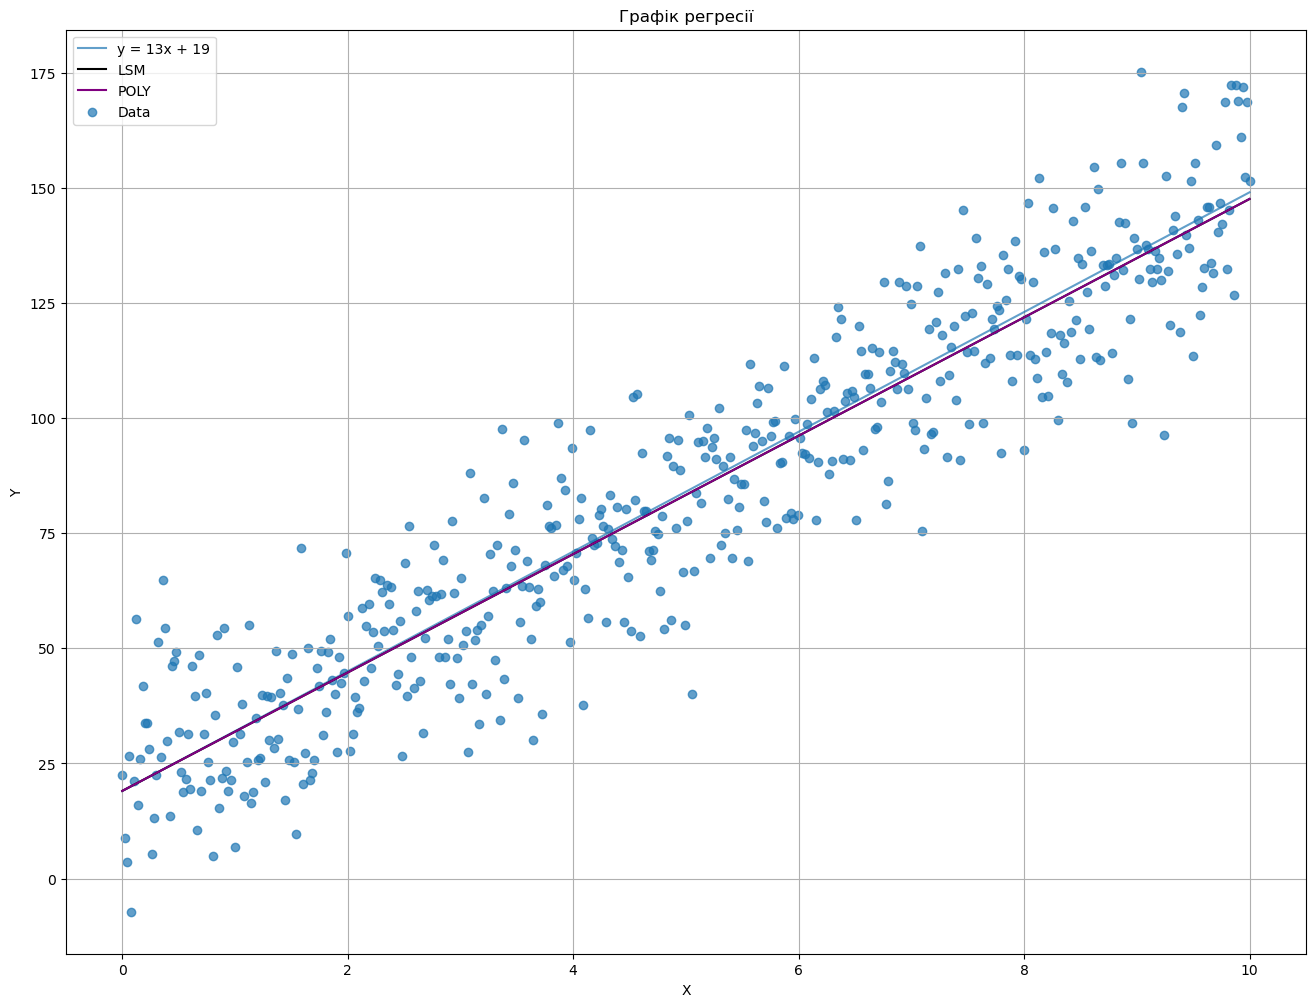

In [5]:
plt.figure(figsize=(16,12))
plt.plot(x, k*x+b, alpha=0.7, label =f'y = {k}x + {b}')
plt.plot(x, k_LSM*x+b_LSM, color ='black', label ='LSM')
plt.plot(x, k_POLY*x+b_POLY, color ='purple', label ='POLY')
plt.scatter(data.X, data.Y, alpha=0.7, label='Data')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Графік регресії')
plt.grid(True)

plt.show()

Градієнтний Спуск

In [6]:
def gradient(x, y, learning_rate, n_iter):
    k = 0
    b = 0
    n = len(x)

    for _ in range(n_iter):
        predict = k * x + b
        gradient_k = (-2/n) * sum(x * (y - predict))
        gradient_b = (-2/n) * sum(y - predict)

        k = k - learning_rate * gradient_k
        b = b - learning_rate * gradient_b

    return k, b

k_GRAD, b_GRAD = gradient(data.X, data.Y, 0.01, 500)
print(f"k(GRAD): {k_GRAD}")
print(f"b(GRAD): {b_GRAD}")



k(GRAD): 13.068538711089941
b(GRAD): 17.594424300811053


Візуалізуємо

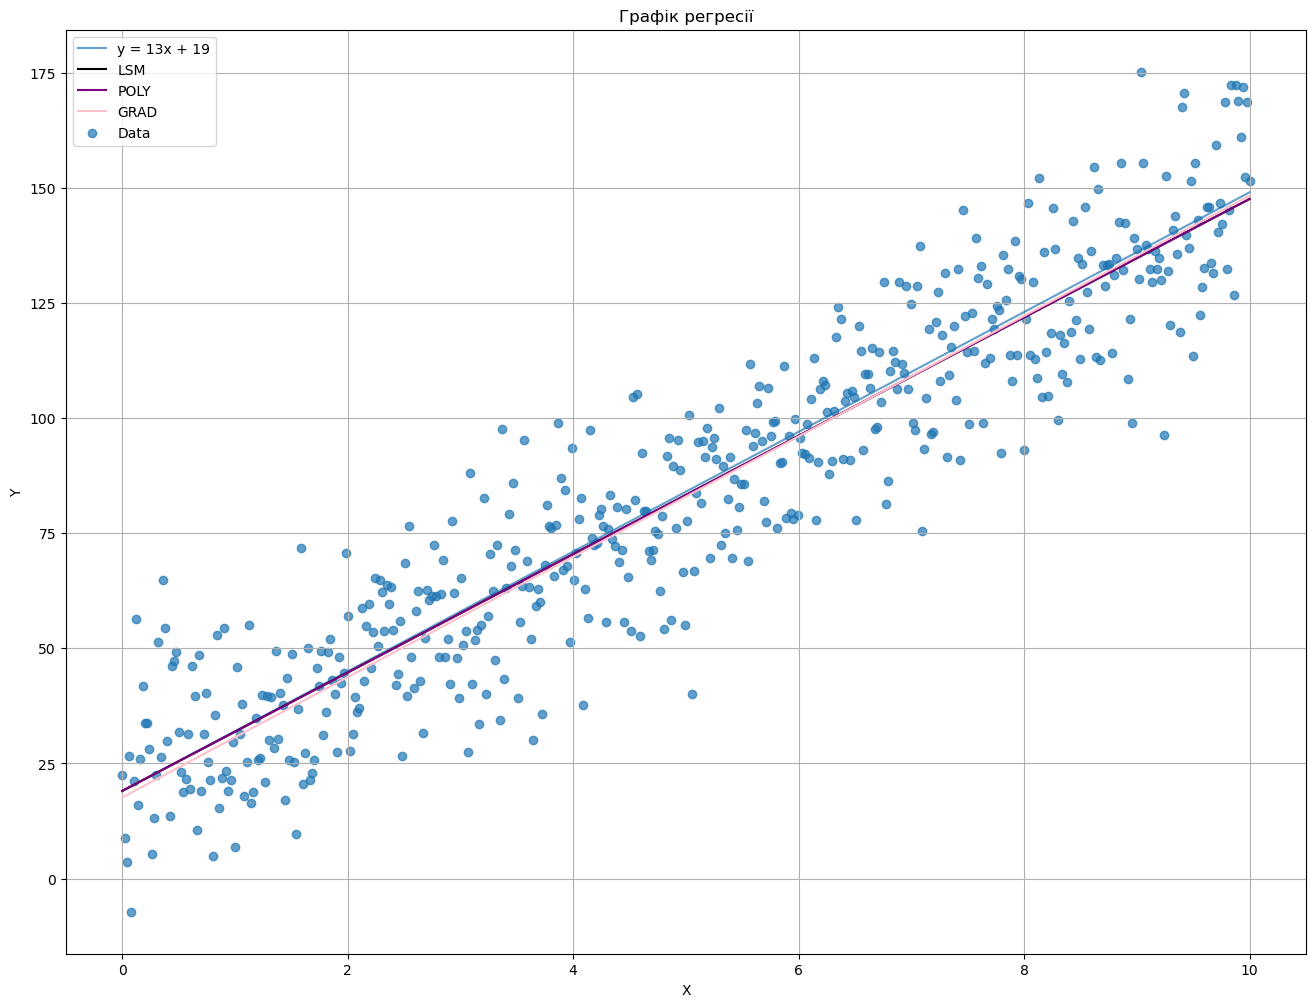

In [7]:
plt.figure(figsize=(16,12))
plt.plot(x, k*x+b, alpha=0.7, label =f'y = {k}x + {b}')
plt.plot(x, k_LSM*x+b_LSM, color ='black', label ='LSM')
plt.plot(x, k_POLY*x+b_POLY, color ='purple', label ='POLY')
plt.plot(x, k_GRAD*x+b_GRAD, color = 'pink', label='GRAD')
plt.scatter(data.X, data.Y, alpha=0.7, label='Data')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Графік регресії')
plt.grid(True)

plt.show()

Залежність похибки від к-сті операцій

In [8]:
def gradsciter():
    results = []

    for n_iter in range(200, 601, 10):

        k_GRAD, b_GRAD = gradient(data.X, data.Y, 0.01, n_iter)

        error_k = abs(13 - k_GRAD)
        error_b = abs(19 - b_GRAD)

        results.append((n_iter, error_k, error_b))
    
    error_data = pd.DataFrame(results, columns=['Iterations', 'Error_k', 'Error_b'])
    return error_data

error_data = gradsciter()

Візуалізація

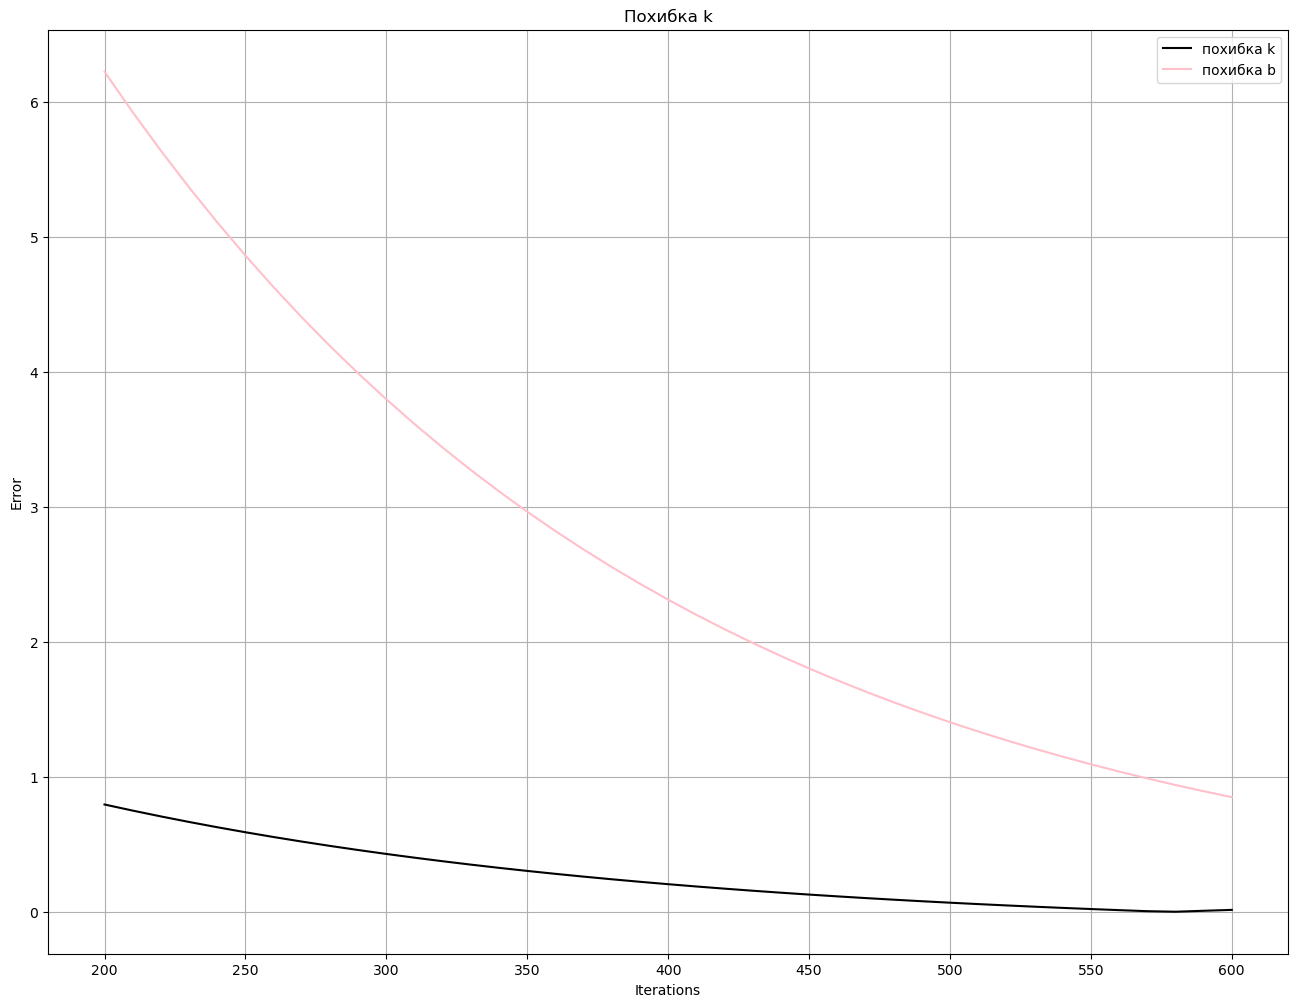

In [9]:
plt.figure(figsize=(16, 12))
plt.plot(error_data.Iterations, error_data.Error_k, color = 'black', label = 'похибка k')
plt.plot(error_data.Iterations, error_data.Error_b, color = 'pink', label = 'похибка b')

plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Похибка k')
plt.grid(True)

plt.show()